# Gabungan (3) dengan BERT-BiLSTM

# Install Lib

In [1]:
import nltk
import tensorflow as tf
import numpy as np

from nltk.corpus import stopwords
from keras.preprocessing import sequence

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Init Data

In [2]:
from io import BytesIO
import os
import requests
import pandas as pd

folder_path = '../../All Dataset'
file_name = 'Prepocessed (3).xlsx'
file_path = os.path.join(folder_path, file_name)

df = pd.read_excel(file_path)
df

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

## Split dataset

In [3]:

# Load data dari CSV
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

# Ambil X_train dan y_train dari DataFrame
X_train = df_train['content_lemma'].values   # jadi array numpy
y_train = df_train['labels'].values

# Ambil X_test dan y_test dari DataFrame
X_test = df_test['content_lemma'].values   # jadi array numpy
y_test = df_test['labels'].values

In [4]:

# Cek ukuran data
print(f'Jumlah data train: {len(X_train)}')
print(f'Jumlah data test: {len(X_test)}')

Jumlah data train: 1751
Jumlah data test: 751


In [5]:
y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

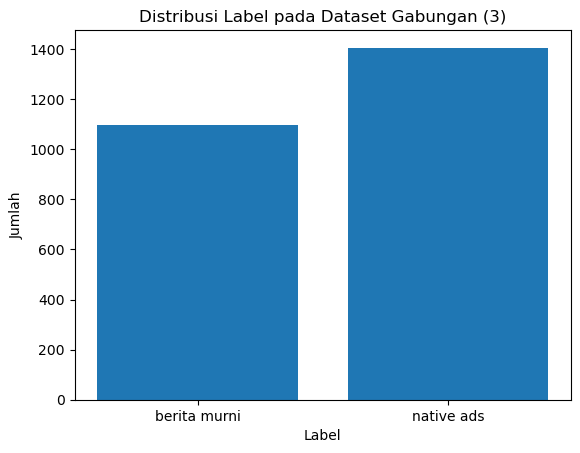

Jumlah data di Distribusi Label pada Dataset Gabungan (3): 2502
label-berita
berita murni    1097
native ads      1405
Name: count, dtype: int64
-------------------------


In [6]:
import matplotlib.pyplot as plt

def plot_label_distribution(df, title):
    counts = df['label-berita'].value_counts().sort_index()
    plt.bar(counts.index.astype(str), counts.values)
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.show()
    print(f"Jumlah data di {title}: {len(df)}")
    print(counts)
    print('-------------------------')

# Contoh pemanggilan fungsi dengan DataFrame berbeda
plot_label_distribution(df, 'Distribusi Label pada Dataset Gabungan (3)')

# BERT-Bi-lSTM

## Word Embedding (BERT)

In [7]:
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer, BertModel
from transformers import TFBertModel
#tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)
indobert = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [8]:
#model = BertModel.from_pretrained('indobenchmark/indobert-base-p1', output_hidden_states = True)
#model.eval()

In [9]:
max_len = 257
def encode_texts(text_list):
   # Inisialisasi list untuk menampung hasil
    input_ids = []
    attention_masks = []

    for text in text_list:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Tambahkan [CLS] dan [SEP]
            max_length=max_len,
            padding='max_length',
            truncation=True,  # Aktifkan pemotongan jika teks lebih panjang
            return_tensors='np',  # Mengembalikan TensorFlow tensors
            return_attention_mask=True  # Menghasilkan attention mask
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return {'input_ids': tf.concat(input_ids, axis=0), 'attention_mask': tf.concat(attention_masks, axis=0)}

In [10]:
# Encode data training dan testing
import numpy as np

train_encodings = encode_texts(list(X_train))
test_encodings = encode_texts(list(X_test))

In [11]:
# build model fine tuning bert
# def get_embeddings(encoded_texts, batch_size=16):
#     outputs = indobert(encoded_texts['input_ids'], attention_mask=encoded_texts['attention_mask'])
#     return outputs.last_hidden_state  # Mengambil output embeddings

# Function to get embeddings with smaller batch size
def get_embeddings(encoded_texts, batch_size=16):
    embeddings = []
    for i in range(0, len(encoded_texts['input_ids']), batch_size):
        batch_input_ids = encoded_texts['input_ids'][i:i+batch_size]
        batch_attention_mask = encoded_texts['attention_mask'][i:i+batch_size]
        outputs = indobert(batch_input_ids, attention_mask=batch_attention_mask)
        embeddings.append(outputs.last_hidden_state)
    return tf.concat(embeddings, axis=0)

# Mendapatkan embeddings untuk data training dan testing
train_embeddings = get_embeddings(train_encodings)
test_embeddings = get_embeddings(test_encodings)

In [12]:
from tensorflow.keras.layers import Input
# Input untuk token IDs dan attention mask
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [13]:
# Verifikasi tipe dan shape dari input_ids dan attention_mask
print(f"Type of input_ids: {type(input_ids)}")
print(f"Shape of input_ids: {input_ids.shape}")
print(f"Type of attention_mask: {type(attention_mask)}")
print(f"Shape of attention_mask: {attention_mask.shape}")

Type of input_ids: <class 'keras.src.backend.common.keras_tensor.KerasTensor'>
Shape of input_ids: (None, 257)
Type of attention_mask: <class 'keras.src.backend.common.keras_tensor.KerasTensor'>
Shape of attention_mask: (None, 257)


## Bi-LSTM

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from transformers import TFBertModel, BertTokenizer

class BertLayer(Layer):
    def __init__(self, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.indobert = TFBertModel.from_pretrained('indobenchmark/indobert-base-p1', from_pt=True)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.indobert(input_ids, attention_mask=attention_mask)
        return output.last_hidden_state

# Definisikan input Keras
input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

# Gunakan BertLayer di dalam model Keras
bert_output = BertLayer()([input_ids, attention_mask])

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [15]:
# Mendapatkan embeddings dari IndoBERT
# bert_output = indobert(input_ids, attention_mask=attention_mask)
sequence_output = bert_output[0]  # Mengambil last_hidden_state
sequence_output

<KerasTensor shape=(257, 768), dtype=float32, sparse=False, name=keras_tensor_1>

In [16]:
import tensorflow as tf

out = tf.keras.layers.BatchNormalization()(bert_output)
out = tf.keras.layers.Dropout(0.2)(out)
out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(out)
out = tf.keras.layers.GlobalMaxPooling1D()(out)
out = tf.keras.layers.Dropout(0.2)(out)
y = tf.keras.layers.Dense(2, activation="sigmoid")(out)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)
model.layers[2].trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-05)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)        │ (None, 257)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_mask (InputLayer)   │ (None, 257)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bert_layer (BertLayer)        │ (None, 257, 768)          │               0 │ input_ids[0][0],           │
│                               │                           │                 │ attention_mask[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 257, 768)          │           3,072 │ bert_layer[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 257, 768)          │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 257, 512)          │       2,099,200 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling1d          │ (None, 512)               │               0 │ bidirectional[0][0]        │
│ (GlobalMaxPooling1D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 512)               │               0 │ global_max_pooling1d[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 2)                 │           1,026 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,103,298 (8.02 MB)

 Trainable params: 2,101,762 (8.02 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Gunakan 'sparse_categorical_crossentropy' jika label adalah integer
              metrics=['accuracy'])

In [18]:
print("train input_ids shape:", train_encodings['input_ids'].shape)
print("train attention_mask shape:", train_encodings['attention_mask'].shape)
print("y_train_dl shape:", y_train_dl.shape)


train input_ids shape: (1751, 257)
train attention_mask shape: (1751, 257)
y_train_dl shape: (1751, 2)


In [19]:
history = model.fit(x={'input_ids':train_encodings['input_ids'], 'attention_mask':train_encodings['attention_mask']},
                    y=y_train_dl,
                    validation_data=(
                        {'input_ids':test_encodings['input_ids'], 'attention_mask':test_encodings['attention_mask']},
                    y_test_dl),
                    epochs=50,
                    batch_size=8)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1015s 5s/step - accuracy: 0.8238 - loss: 0.3988 - val_accuracy: 0.9121 - val_loss: 0.2328
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1039s 5s/step - accuracy: 0.9269 - loss: 0.1890 - val_accuracy: 0.8868 - val_loss: 0.3357
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1043s 5s/step - accuracy: 0.9510 - loss: 0.1229 - val_accuracy: 0.9161 - val_loss: 0.2476
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1001s 5s/step - accuracy: 0.9747 - loss: 0.0771 - val_accuracy: 0.9188 - val_loss: 0.2223
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1041s 5s/step - accuracy: 0.9879 - loss: 0.0429 - val_accuracy: 0.9134 - val_loss: 0.2730
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 0.9857 - loss: 0.0499 - val_accuracy: 0.9161 - val_loss: 0.2774
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1035s 5s/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9228 - val_loss: 0.2554
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1043s 5s/step - accuracy: 0.9910 - loss: 0.0283 - v

In [20]:
# Prediction
from sklearn.metrics import classification_report

predicted_raw = model.predict(
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})

y_pred = np.argmax(predicted_raw, axis=1)
y_true = y_test_dl

# Periksa tipe data
print(f'y_true dtype: {y_true.dtype}, shape: {y_true.shape}')
print(f'y_pred dtype: {y_pred.dtype}, shape: {y_pred.shape}')

# Ubah y_true dari one-hot encoded ke label kelas
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 260s 11s/step
y_true dtype: float64, shape: (751, 2)
y_pred dtype: int64, shape: (751,)
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       329
           1       0.96      0.91      0.93       422

    accuracy                           0.93       751
   macro avg       0.93      0.93      0.93       751
weighted avg       0.93      0.93      0.93       751



In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_true, y_pred,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_true, y_pred))

Precision :  0.9258495734299654
Recall    :  0.9299903484636771
F-score   :  0.927371520265914
Accuracy :  0.9280958721704394


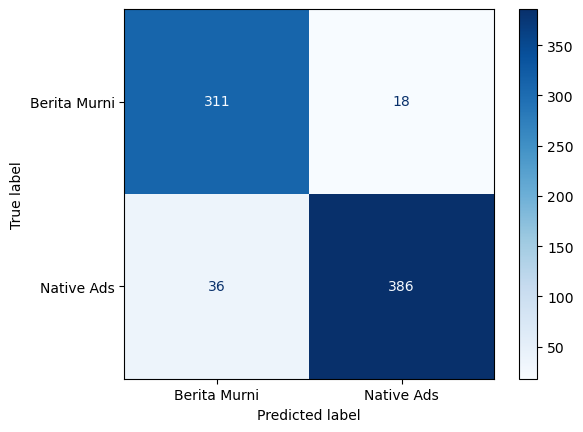

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["Berita Murni", "Native Ads"]

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## ROC

C:\Users\Asiyah\anaconda3\envs\asiyah_env\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


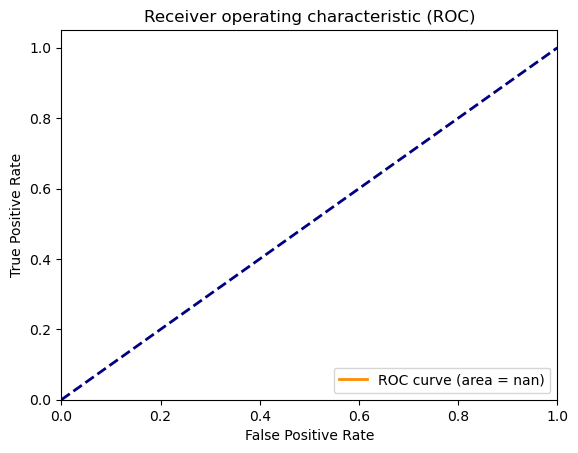

In [23]:
from sklearn import metrics

y = np.array(y_true)

scores = np.array(y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)

In [25]:
auc_rf

0.9299903484636771

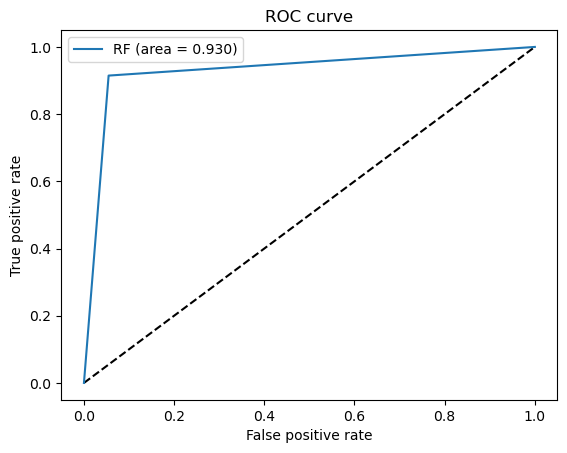

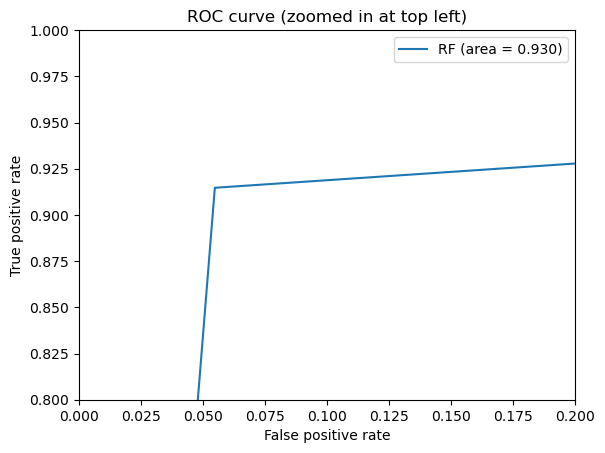

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [27]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

In [28]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_true, y_pred)

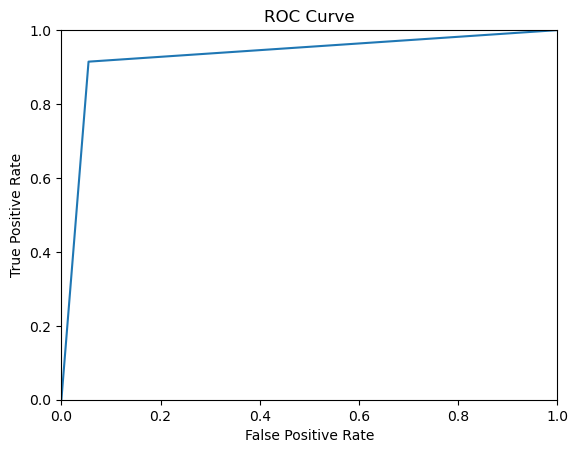

In [29]:
plot_roc_curve (fpr,tpr)

In [30]:
roc_auc_score(y_true, y_pred)

0.9299903484636771

0.9299903484636771


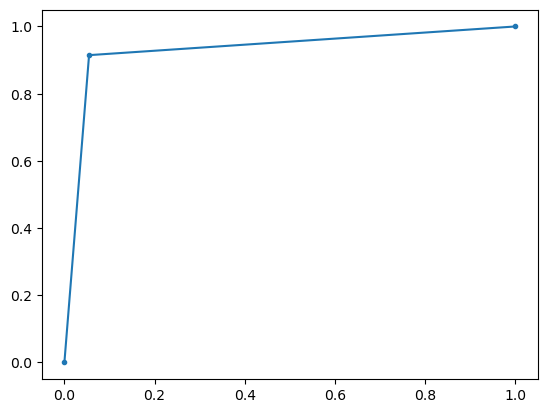

In [31]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [32]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [33]:
perf_measure(y_true, y_pred)

(386, 18, 311, 36)

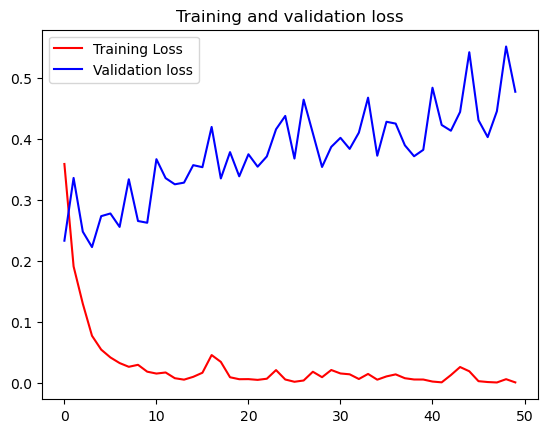

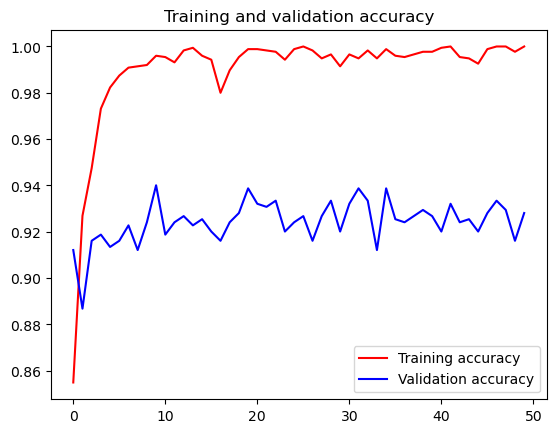

<Figure size 640x480 with 0 Axes>

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Menampilkan data yang salah di deteksi

In [35]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    TP_indices = []
    TN_indices = []
    FP_indices = []
    FN_indices = []

    for i in range(len(y_hat)):
        if y_actual[i] == y_hat[i] == 1:
            TP += 1
            TP_indices.append(i)
        elif y_hat[i] == 1 and y_actual[i] != y_hat[i]:  # False Positive
            FP += 1
            FP_indices.append(i)
        elif y_actual[i] == y_hat[i] == 0:
            TN += 1
            TN_indices.append(i)
        elif y_hat[i] == 0 and y_actual[i] != y_hat[i]:  # False Negative
            FN += 1
            FN_indices.append(i)

    return TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices

In [36]:
perf_measure(y_true, y_pred)

(386,
 18,
 311,
 36,
 [0,
  1,
  5,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  21,
  24,
  26,
  33,
  34,
  35,
  38,
  40,
  43,
  45,
  46,
  47,
  50,
  51,
  55,
  57,
  63,
  64,
  65,
  66,
  67,
  70,
  71,
  72,
  74,
  75,
  76,
  78,
  82,
  83,
  84,
  86,
  89,
  90,
  92,
  93,
  94,
  95,
  97,
  98,
  99,
  104,
  107,
  109,
  112,
  113,
  120,
  121,
  124,
  129,
  131,
  133,
  134,
  136,
  137,
  138,
  139,
  141,
  143,
  144,
  151,
  152,
  153,
  154,
  157,
  162,
  163,
  164,
  165,
  166,
  167,
  172,
  173,
  174,
  176,
  177,
  180,
  184,
  186,
  188,
  190,
  191,
  193,
  194,
  195,
  197,
  198,
  199,
  200,
  202,
  204,
  205,
  210,
  212,
  213,
  214,
  216,
  217,
  219,
  225,
  229,
  231,
  232,
  233,
  235,
  236,
  237,
  239,
  242,
  245,
  247,
  249,
  250,
  251,
  252,
  254,
  259,
  264,
  265,
  266,
  267,
  268,
  269,
  270,
  271,
  272,
  277,
  279,
  281,
  282,
  283,
  284,
  287,
  289,
  290,
  

In [37]:
# Calculate the performance metrics and retrieve indices
TP, FP, TN, FN, TP_indices, FP_indices, TN_indices, FN_indices = perf_measure(y_true, y_pred)

# Select the FP and FN data from the dataset
FP_data = df.iloc[FP_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]
FN_data = df.iloc[FN_indices][['id-berita', 'url', 'content per paragraf', 'content_stopwords']]

In [38]:
# Display the results
print("False Positives (FP):")
print(FP_data)
print('Jumlah dari FP adalah',len(FP_data), 'paragraf.')

print("\nFalse Negatives (FN):")
print(FN_data)
print('Jumlah dari FN adalah',len(FN_data), 'paragraf.')

False Positives (FP):
     id-berita                                                url  \
20         231  https://tekno.sindonews.com/read/799655/776/ma...   
36         235  https://tekno.sindonews.com/read/787787/776/zi...   
42         236  https://tekno.sindonews.com/read/784509/776/ca...   
140        253  https://tekno.sindonews.com/read/741011/776/hu...   
222        260  https://tekno.sindonews.com/read/702041/776/as...   
224        260  https://tekno.sindonews.com/read/702041/776/as...   
296        269  https://tekno.sindonews.com/read/673687/776/ep...   
307        271  https://tekno.sindonews.com/read/655545/776/6-...   
336        274  https://tekno.sindonews.com/read/638045/776/as...   
384        278  https://tekno.sindonews.com/read/624421/776/as...   
386        278  https://tekno.sindonews.com/read/624421/776/as...   
435        283  https://tekno.sindonews.com/read/601229/776/sp...   
604        302  https://tekno.sindonews.com/read/512958/776/te...   
606        3

In [39]:
import os
# Specify the folder path
folder_path = 'e:/Asiyah/tesis/Thesis Persuasive Detection at Paragraph-Level/Mine/4 Terbaik (70-30)/Salah deteksi'  # Replace this with your desired folder path
import os
# Contoh folder baru untuk simpan file
folder_name = 'Salah deteksi'

# Buat folder baru jika belum ada
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# Full paths for saving files
fp_file_path = os.path.join(folder_path, 'FP_BERT-BiLSTM.csv.csv')
fn_file_path = os.path.join(folder_path, 'FN_BERT-BiLSTM.csv.csv')

# Save FP_data and FN_data to CSV files within the specified folder
FP_data.to_csv(fp_file_path, index=False)
FN_data.to_csv(fn_file_path, index=False)

### FP & FN

In [40]:
FN_data

,id-berita,url,content per paragraf,content_stopwords
4,229,https://tekno.sindonews.com/read/807727/776/pe...,"Sementara, Absen online merupakan sistem absen...",absen online rupa sistem absensi manfaat jarin...
19,231,https://tekno.sindonews.com/read/799655/776/ma...,Ada segudang fitur bermanfaat di OPPO A96. Sal...,gudang fitur manfaat oppo a salah fitur assist...
29,233,https://tekno.sindonews.com/read/793329/776/di...,”Meski baru berusia beberapa bulan sejak 4 Jan...,usia januari ioh peran aktif dukung selenggara...
48,237,https://tekno.sindonews.com/read/778473/776/be...,"Dalam menyokong performanya, OPPO A55 hadir de...",sokong performa oppo a hadir usung prosesor me...
56,239,https://tekno.sindonews.com/read/768125/776/ku...,Berikut adalah hasil tangkapan fitur kamera mi...,hasil tangkap fitur kamera microlens oppo reno...
96,245,https://tekno.sindonews.com/read/755869/776/ur...,Performa OPPO A96 ditopang oleh prosesor Snapd...,performa oppo a topang prosesor snapdragon pro...
105,247,https://tekno.sindonews.com/read/751047/776/se...,3. OPPO A55 OPPO A55 hadir membawa layar beruk...,oppo a oppo a hadir bawa layar ukur inci lengk...
111,248,https://tekno.sindonews.com/read/751033/776/in...,4. OPPO A16. OPPO A16 juga bisa jadi pertimban...,oppo a oppo a timbang cari smartphone harga rp...
114,249,https://tekno.sindonews.com/read/751023/776/op...,"OPPO A96 sendiri membawa layar besar 6,59 inci...",oppo a bawa layar inci screen-to-body ratio re...
126,251,https://tekno.sindonews.com/read/744779/776/mu...,3. Kemudahan Melakukan Pengecekan Histori Tran...,mudah laku cek histori transaksi cepat sistem ...


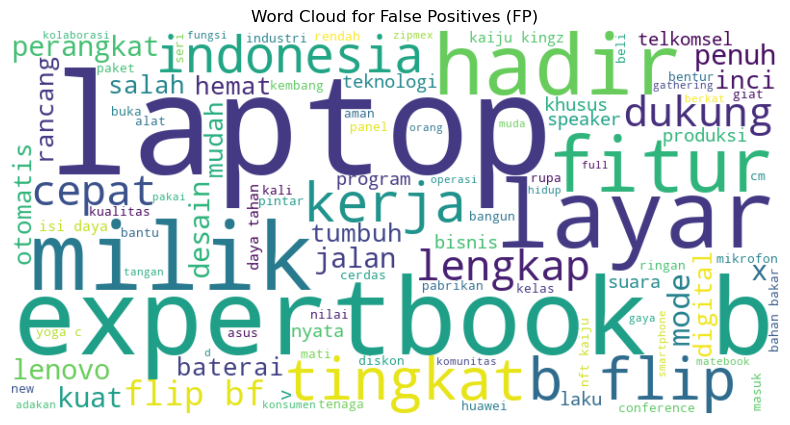

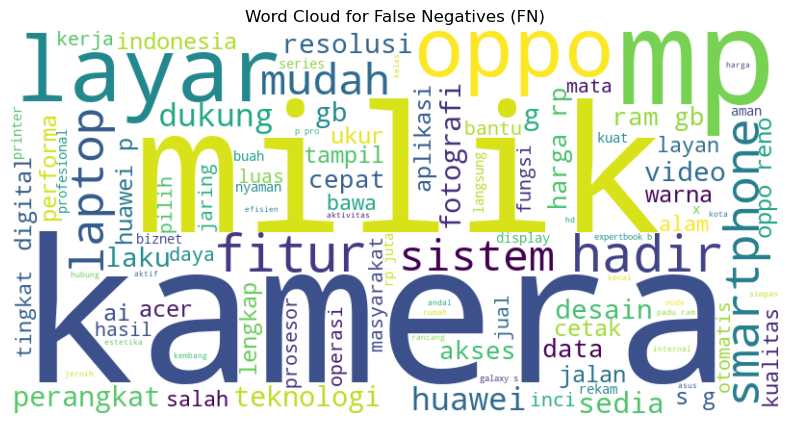

In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam kolom 'content per paragraf' untuk FP dan FN
fp_text = " ".join(paragraph for paragraph in FP_data['content_stopwords'])
fn_text = " ".join(paragraph for paragraph in FN_data['content_stopwords'])

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk False Positives
plot_wordcloud(fp_text, "Word Cloud for False Positives (FP)")

# Membuat word cloud untuk False Negatives
plot_wordcloud(fn_text, "Word Cloud for False Negatives (FN)")

### TP & TN

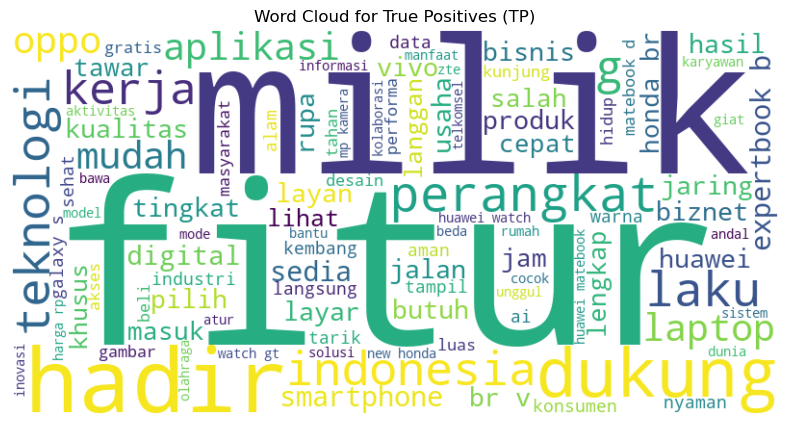

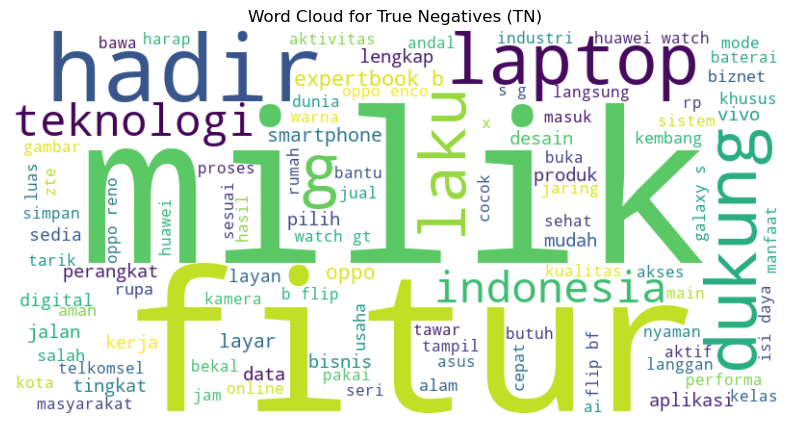

In [42]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil data TP dan TN dari dataset
TP_data = df.iloc[TP_indices]['content_stopwords']
TN_data = df.iloc[TN_indices]['content_stopwords']

# Gabungkan teks dari TP dan TN
tp_text = " ".join(paragraph for paragraph in TP_data)
tn_text = " ".join(paragraph for paragraph in TN_data)

# Fungsi untuk membuat dan menampilkan word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Membuat word cloud untuk True Positives
plot_wordcloud(tp_text, "Word Cloud for True Positives (TP)")

# Membuat word cloud untuk True Negatives
plot_wordcloud(tn_text, "Word Cloud for True Negatives (TN)")